### Universidad Autonoma de Aguascalientes
#### Centro de Ciencias Basicas
#### Departamento de Ciencias de la Computacion
#### Carrera: Ingenieria en Computación Inteligente
#### Materia: Machine Learning
#### Profesor: Dr. Francisco Javier Luna Rosas
#### Examen Parcial 3
#### Integrantes:
* Diego Alberto Aranda Gonzalez
* Dante Alejandro Alegría Romero
* Andrea Margarita Balandrán Félix
* Diego Emilio Moreno Sánchez
###### Descripción del Examen: En este examen se espera que se aplique técnicas de Machine Learning (Aprendizaje por Refuerzo) aplicadas al Web Mining

#### Incluimos las librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Cargamos el tablero del Sudoku del .csv

In [2]:
df = pd.read_csv('C:/Users/diego/Desktop/Universidad/6to-Semestre/Aprendizaje_Inteligente/Aprendizaje_Por_Refurzo/sudoku_0.csv', header=None, sep=',')
df

,0,1,2,3,4,5,6,7,8
0,0,2,3,4,0,6,7,0,9
1,4,5,6,0,8,0,0,0,0
2,0,8,0,1,2,3,0,5,0
3,2,1,0,0,6,0,0,9,7
4,3,6,0,0,0,0,0,1,0
5,0,9,0,2,1,0,0,6,0
6,5,3,1,6,4,0,9,7,0
7,6,0,2,9,7,8,5,0,1
8,0,0,8,5,3,1,0,4,2


#### Creamos el agente, ambiente, acción, estado, algoritmo, politica y funcion de recompesa

In [3]:
# Creamos un arreglo de 9x9 para guardar los valores del sudoku
sudoku = np.zeros((9,9), dtype=int)
for i in range(9):
    for j in range(9):
        sudoku[i][j] = df.iloc[i,j]

# Para aplicar el Q-Learning
# Creamos el agente que va a resolver el sudoku
class SudokuAgent:
    def __init__(self, sudoku):
        self.sudoku = sudoku
        self.q_table = np.zeros((9,9,9))
        self.alpha = 0.1
        self.gamma = 0.6
        self.epsilon = 0.1
        self.actions = [1,2,3,4,5,6,7,8,9]
        self.penalty = -1000
        self.reward = 1000
        self.iterations = 10000
        self.sudoku_solved = False
        self.sudoku_solved_count = 0
        self.sudoku_solved_count_list = []
        self.sudoku_solved_count_list.append(self.sudoku_solved_count)
        self.sudoku_solved_count_list.append(self.sudoku_solved_count)

    def get_possible_actions(self, i, j):
        possible_actions = []
        for action in self.actions:
            if self.sudoku[i][j] == 0:
                possible_actions.append(action)
            else:
                possible_actions.append(0)
        return possible_actions
    
    def get_max_action(self, i, j):
        return np.argmax(self.q_table[i][j])
    
    def get_action(self, i, j):
        if np.random.uniform(0,1) < self.epsilon:
            return np.random.choice(self.actions)
        else:
            return self.get_max_action(i,j)
        
    def update_q_table(self, i, j, action, reward):
        self.q_table[i][j][action-1] = self.q_table[i][j][action-1] + self.alpha * (reward + self.gamma * np.max(self.q_table[i][j]) - self.q_table[i][j][action-1])

    def solve_sudoku(self):
        for _ in range(self.iterations):
            for i in range(9):
                for j in range(9):
                    action = self.get_action(i,j)
                    if self.sudoku[i][j] == 0:
                        if self.sudoku[i][j] == 0:
                            self.sudoku[i][j] = action
                            if self.check_sudoku():
                                self.sudoku_solved = True
                                self.sudoku_solved_count += 1
                                self.sudoku_solved_count_list.append(self.sudoku_solved_count)
                                break
                            else:
                                reward = self.penalty
                        else:
                            reward = self.reward
                        self.update_q_table(i,j,action,reward)
                    if self.sudoku_solved:
                        break
                if self.sudoku_solved:
                    break
            if self.sudoku_solved:
                break
        return self.sudoku
    
    def check_sudoku(self):
        for i in range(9):
            for j in range(9):
                if self.sudoku[i][j] == 0:
                    return False
        return True
    
    def get_sudoku_solved_count(self):
        return self.sudoku_solved_count_list
    
    def get_q_table(self):
        return self.q_table
    
    def get_sudoku(self):
        return self.sudoku
    
    def get_sudoku_solved(self):
        return self.sudoku_solved
    
    def get_iterations(self):
        return self.iterations
    
    def get_alpha(self):
        return self.alpha
    
    def get_gamma(self):
        return self.gamma
    
    def get_epsilon(self):
        return self.epsilon
    
    def get_reward(self):
        return self.reward
    
    def get_penalty(self):
        return self.penalty
    
    def get_actions(self):
        return self.actions
    
    def get_sudoku_solved_count_list(self):
        return self.sudoku_solved_count_list
    
sudoku_agent = SudokuAgent(sudoku)
sudoku_agent.solve_sudoku()
sudoku_agent.get_sudoku()

#Creamos el ambiente para el agente
class SudokuEnvironment:
    def __init__(self, sudoku):
        self.sudoku = sudoku
        self.sudoku_agent = SudokuAgent(self.sudoku)
    
    def get_sudoku(self):
        return self.sudoku
    
    def get_sudoku_agent(self):
        return self.sudoku_agent
    
sudoku_environment = SudokuEnvironment(sudoku)
sudoku_environment.get_sudoku()
sudoku_environment.get_sudoku_agent().solve_sudoku()
sudoku_environment.get_sudoku_agent().get_sudoku()

# Creamos la funcion de recompensa
def reward(sudoku_agent):
    if sudoku_agent.get_sudoku_solved():
        return sudoku_agent.get_reward()
    else:
        return sudoku_agent.get_penalty()
    
# Creamos la funcion de entrenamiento
def train(sudoku_agent, sudoku_environment):
    for _ in range(sudoku_agent.get_iterations()):
        for i in range(9):
            for j in range(9):
                action = sudoku_agent.get_action(i,j)
                if sudoku_agent.get_sudoku()[i][j] == 0:
                    sudoku_agent.get_sudoku()[i][j] = action
                    if sudoku_agent.check_sudoku():
                        sudoku_agent.sudoku_solved = True
                        break
                    else:
                        r = reward(sudoku_agent)
                    sudoku_agent.update_q_table(i,j,action,r)
                if sudoku_agent.get_sudoku_solved():
                    break
            if sudoku_agent.get_sudoku_solved():
                break
        if sudoku_agent.get_sudoku_solved():
            break
    return sudoku_agent

def test(sudoku_agent, sudoku_environment):
    sudoku_agent.solve_sudoku()
    return sudoku_agent

sudoku_agent = train(sudoku_agent, sudoku_environment)
sudoku_agent.get_sudoku()



array([[3, 2, 3, 4, 1, 6, 7, 4, 9],
       [4, 5, 6, 8, 8, 5, 9, 4, 4],
       [5, 8, 6, 1, 2, 3, 2, 5, 5],
       [2, 1, 7, 7, 6, 5, 3, 9, 7],
       [3, 6, 4, 6, 1, 4, 1, 1, 9],
       [2, 9, 9, 2, 1, 6, 5, 6, 9],
       [5, 3, 1, 6, 4, 3, 9, 7, 7],
       [6, 6, 2, 9, 7, 8, 5, 8, 1],
       [8, 1, 8, 5, 3, 1, 1, 4, 2]])

#### Imprimios los Resultados

[   0.            0.         -100.            0.            0.
    0.            0.            0.         -890.58101087]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[   0.           0.           0.           0.           0.
    0.           0.           0.        -947.6652367]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[   0.    0.    0. -100.    0.    0.    0.    0. -190.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[   0.         0.         0.         0.         0.         0.
    0.      -100.      -569.53279]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[   0.    0.    0.    0. -100.    0.    0.    0. -100.]
[   0.    0.    0.    0.    0.    0.    0.    0. -271.]
[   0.    0.    0. -100.    0.    0.    0.    0. -100.]
[   0.            0.            0.         -100.            0.
    0.            0.            0.         -935.38918111]
[   0.            0.            0.

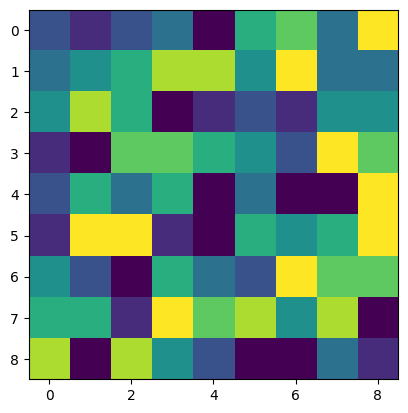

[3 2 3 4 1 6 7 4 9]
[4 5 6 8 8 5 9 4 4]
[5 8 6 1 2 3 2 5 5]
[2 1 7 7 6 5 3 9 7]
[3 6 4 6 1 4 1 1 9]
[2 9 9 2 1 6 5 6 9]
[5 3 1 6 4 3 9 7 7]
[6 6 2 9 7 8 5 8 1]
[8 1 8 5 3 1 1 4 2]


In [4]:
#Imprimimos los diferentes valores de la tabla Q
q_table = sudoku_agent.get_q_table()
for i in range(9):
    for j in range(9):
        print(q_table[i][j])

# Graficamos el sudoku resuelto
sudoku = sudoku_agent.get_sudoku()
plt.imshow(sudoku, cmap='viridis')
plt.show()

# Impirmimos el sudoku resuelto
sudoku = sudoku_agent.get_sudoku()
for i in range(9):
    print(sudoku[i])


#### Conclusiones

###### La implementación de estas tecnicas para el Machine Learning son de gran utilidad para poder entrenar a "agentes" que puedan resolver problemas y seguir aprendiendo de estos para ser más precisos, el uso de estas tecnicas son fundamentales para casos como las IA's en los videojuegos y son interesantes de aplicar.

#### Referencias APA

##### https://www.aprendemachinelearning.com/aprendizaje-por-refuerzo/